This is how much space the figure will take up on letter paper


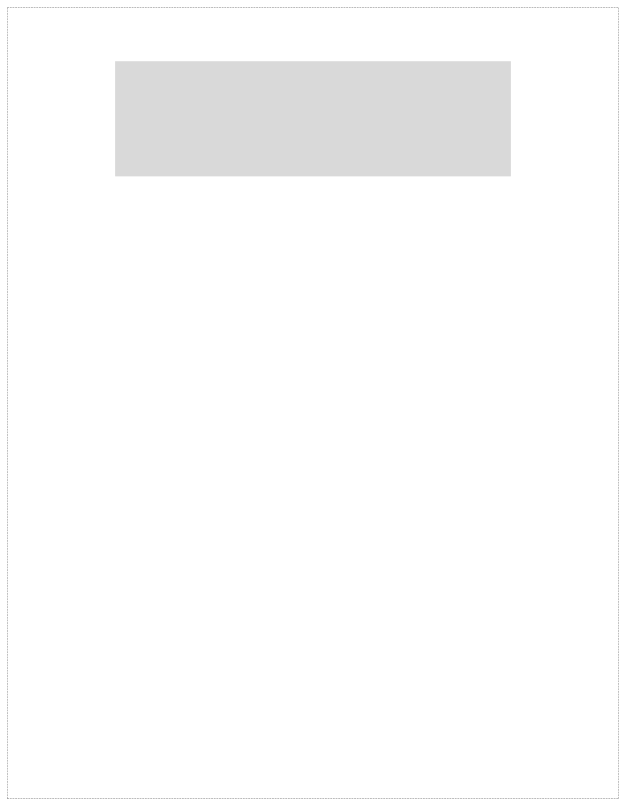

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'sbm'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [3]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx

from symfac.experimental import RBFExpansionV2

In [6]:
sizes = [10, 20, 30, 40, 50]
probs = [[0.8, 0.2, 0.2, 0.2, 0.2], [0.2, 0.8, 0.2, 0.2, 0.2], [0.2, 0.2, 0.8, 0.2, 0.2], [0.2, 0.2, 0.2, 0.8, 0.2], [0.2, 0.2, 0.2, 0.2, 0.8]]
A = nx.stochastic_block_model(sizes, probs, seed=0)
K1 = nx.to_numpy_array(A)
K1 = torch.tensor(K1, dtype=torch.float32)

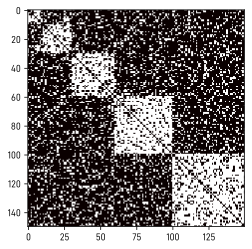

In [7]:
plt.imshow(K1, cmap='hot', interpolation='nearest')
plt.show()

0.2139104


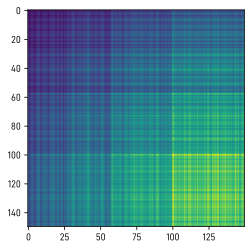

In [8]:
U, S, V = np.linalg.svd(K1.detach().numpy())
svd1 = torch.tensor((U[:, :1] * S[None, :1]) @ V[:1, :])
plt.imshow(svd1)
print(round(float(F.mse_loss(torch.tensor((U[:, :1] * S[None, :1]) @ V[:1, :]), K1)), 8))

0.15676552


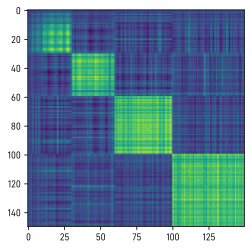

In [11]:
U, S, V = np.linalg.svd(K1.detach().numpy())
svd_approx_5 = torch.tensor((U[:, :4] * S[None, :4]) @ V[:4, :])
plt.imshow(svd_approx_5)
print(round(float(F.mse_loss(svd_approx_5, K1)), 8))

0.15211855


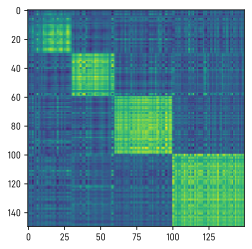

In [12]:
U, S, V = np.linalg.svd(K1.detach().numpy())
svd_approx_5 = torch.tensor((U[:, :5] * S[None, :5]) @ V[:5, :])
plt.imshow(svd_approx_5)
print(round(float(F.mse_loss(svd_approx_5, K1)), 8))

100%|██████████| 10000/10000 [00:26<00:00, 377.86it/s]


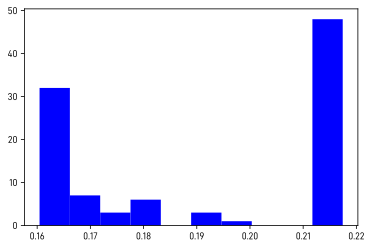

tensor(0.1604)


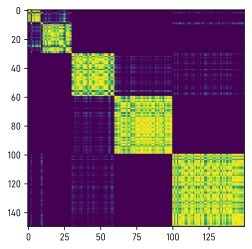

[tensor(0.1604)]


In [48]:
errors = []
k=1
bs=100
u0=1/1000*torch.randn([bs, 150, 1], device="cuda") 
a=torch.randn([bs, 1], device="cuda")
b=torch.randn([bs], device="cuda")
fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=10000)
fac.fith(
    K1,
    u0=u0,
    a0=a,
    b0=b
  )
plt.hist(fac.report.loss_best, color='b', label='1')
plt.show()

plt.show()
error = fac.report.loss_best
print(torch.min(error))
errors.append(torch.min(error))
plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
plt.show()
print(errors)


In [49]:
torch.argmin(fac.report.loss_best)

tensor(71)

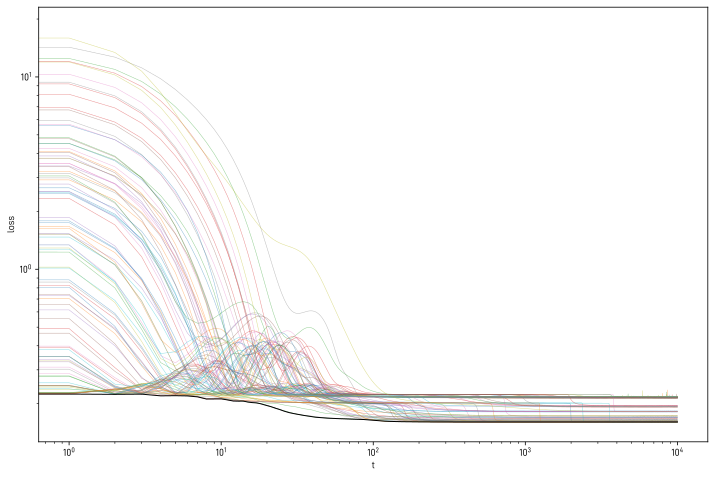

In [68]:
plt.figure(figsize=(12, 8))
plt.plot(
    fac.report.loss_history_ticks,
    fac.report.loss_history,
    lw=0.5,
    alpha=0.5,
)
plt.plot(
    fac.report.loss_history_ticks,
    fac.report.loss_history.min(axis=1),
    lw=1,
    color='k'
)


plt.xlabel('t')
plt.ylabel('loss')
plt.xscale('log')
plt.yscale('log')
plt.show()

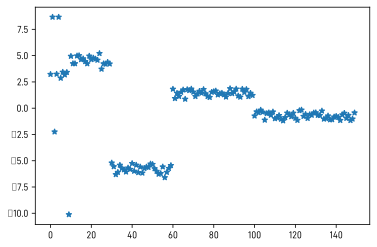

In [71]:
plt.plot(fac.report[0][0][71,:,:].cpu(), '*')

In [72]:
K=K1

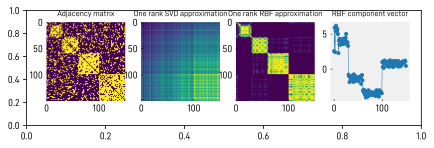

In [73]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]

axs[0].imshow(K)

axs[0].set_title(f'Adjacency matrix', fontsize=8)
axs[1].imshow(svd1)
axs[1].set_title(f'One rank SVD approximation', fontsize=8)
axs[2].imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
axs[2].set_title(f'One rank RBF approximation', fontsize=8)
axs[3].plot(fac.report[0][0][torch.argmin(fac.report.loss_best),:,:].cpu(), '.-')
axs[3].set_title(f'RBF component vector', fontsize=8)


if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')
plt.show()

100%|██████████| 10000/10000 [00:25<00:00, 396.15it/s]


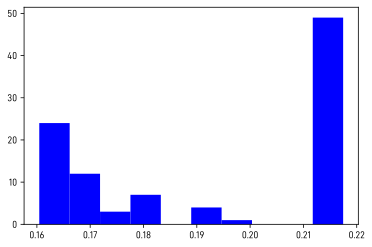

tensor(0.1604)


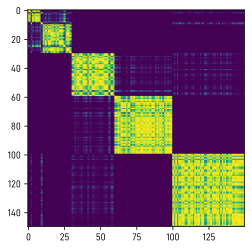

[tensor(0.1604)]


In [74]:
errors = []
k=2
bs=100
u0=1/1000*torch.randn([bs, 150, 1], device="cuda") 
a=torch.randn([bs, 1], device="cuda")
b=torch.randn([bs], device="cuda")
fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=10000)
fac.fith(
    K1,
    u0=u0,
    a0=a,
    b0=b
  )
plt.hist(fac.report.loss_best, color='b', label='1')
plt.show()

plt.show()
error = fac.report.loss_best
print(torch.min(error))
errors.append(torch.min(error))
plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
plt.show()
print(errors)
